In [1]:
import os
import cv2
import torch
import numpy as np
from models import networks

In [2]:
D_A = networks.define_D(3, 64, "basic", norm='instance')
D_B = networks.define_D(3, 64, "basic", norm='instance')
loss = networks.GANLoss("lsgan")

initialize network with normal
initialize network with normal


In [3]:
def load_saves(net, epoch, name, save_dir, device=torch.device('cpu')):
    
    def __patch_instance_norm_state_dict(state_dict, module, keys, i=0):
        """Fix InstanceNorm checkpoints incompatibility (prior to 0.4)"""
        key = keys[i]
        if i + 1 == len(keys):  # at the end, pointing to a parameter/buffer
            if module.__class__.__name__.startswith('InstanceNorm') and \
                    (key == 'running_mean' or key == 'running_var'):
                if getattr(module, key) is None:
                    state_dict.pop('.'.join(keys))
            if module.__class__.__name__.startswith('InstanceNorm') and \
               (key == 'num_batches_tracked'):
                state_dict.pop('.'.join(keys))
        else:
            __patch_instance_norm_state_dict(state_dict, getattr(module, key), keys, i + 1)
    
    load_filename = '%s_net_%s.pth' % (epoch, name)
    load_path = os.path.join(save_dir, load_filename)

    state_dict = torch.load(load_path, map_location=str(device))
    if hasattr(state_dict, '_metadata'):
        del state_dict._metadata

    for key in list(state_dict.keys()):  # need to copy keys here because we mutate in loop
        __patch_instance_norm_state_dict(state_dict, net, key.split('.'))
    net.load_state_dict(state_dict)

In [4]:
load_saves(D_A, "res", "D_A", "pre_mod")
load_saves(D_B, "res", "D_B", "pre_mod")

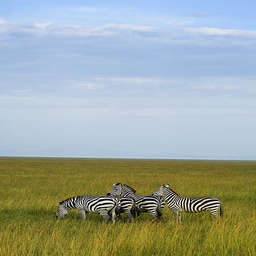

0.9582598805427551


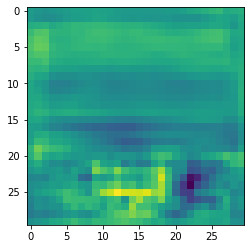

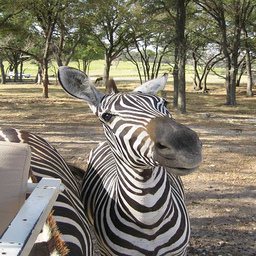

0.5267056226730347


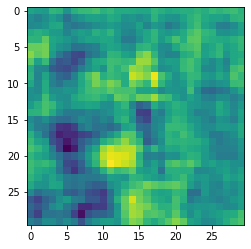

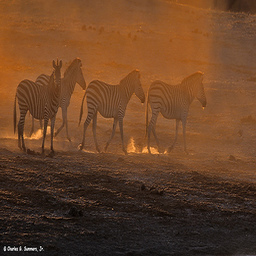

0.8082351088523865


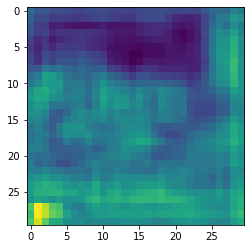

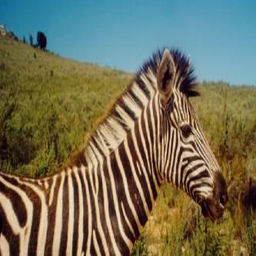

0.5976001024246216


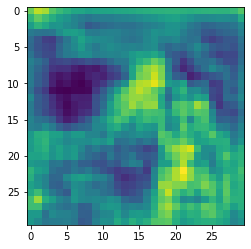

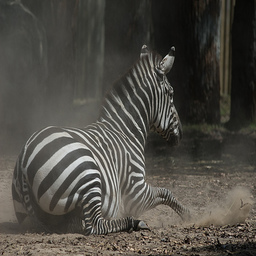

0.37519341707229614


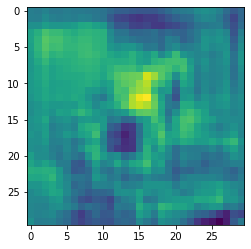

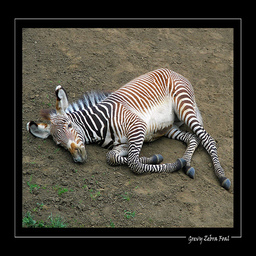

0.19082972407341003


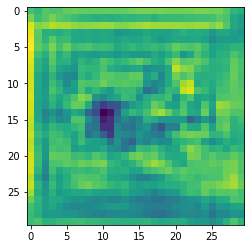

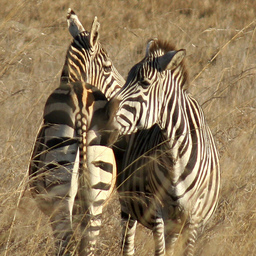

0.7656942009925842


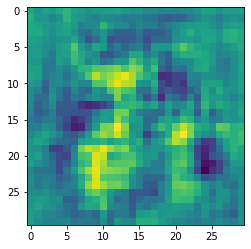

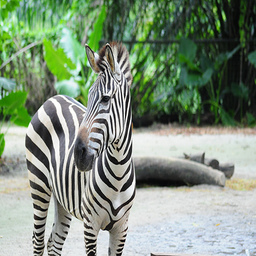

0.340646356344223


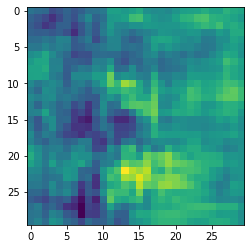

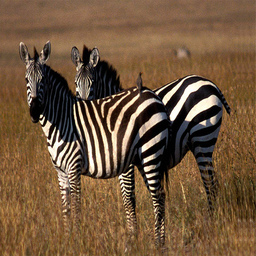

0.26703542470932007


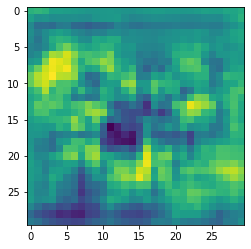

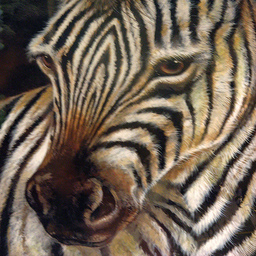

0.5347340106964111


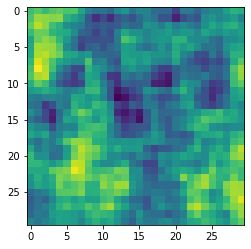

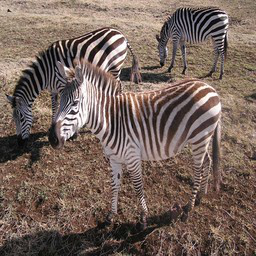

0.7325968146324158


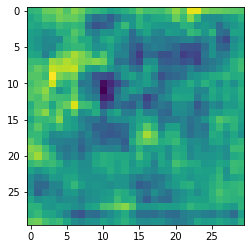

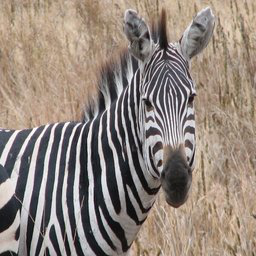

0.11947845667600632


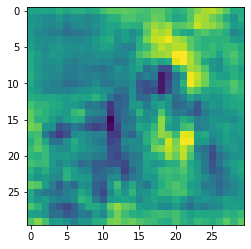

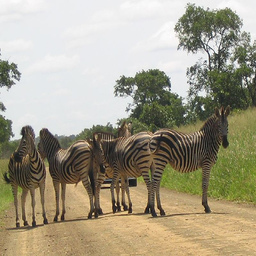

0.9446321725845337


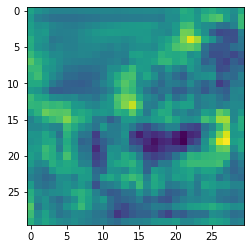

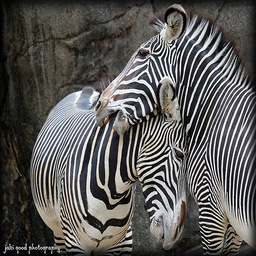

0.09889953583478928


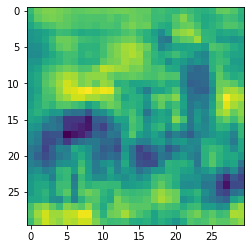

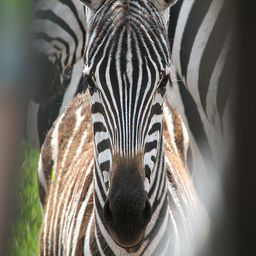

0.3248465359210968


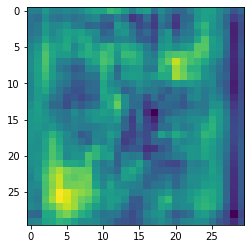

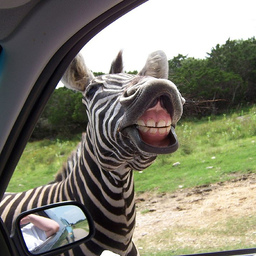

0.9437605738639832


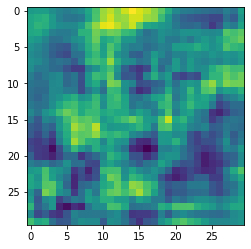

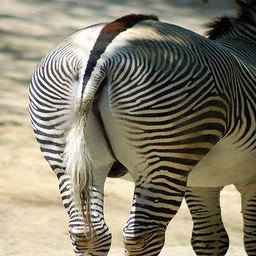

0.3141207695007324


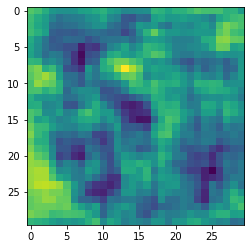

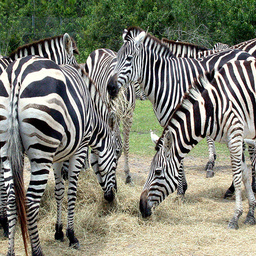

0.43610697984695435


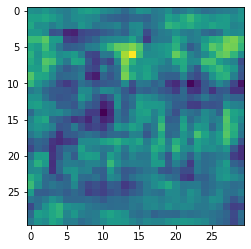

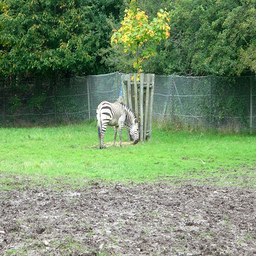

0.9862403869628906


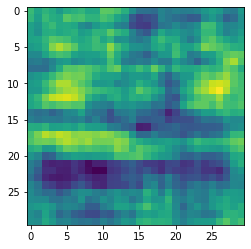

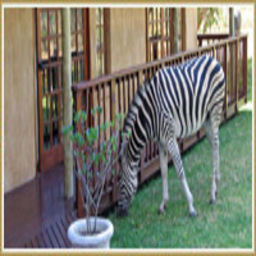

0.5740060806274414


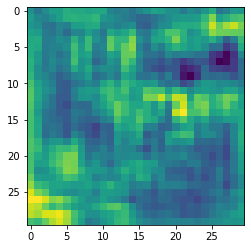

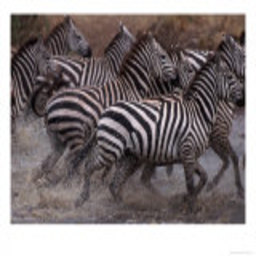

0.2027852088212967


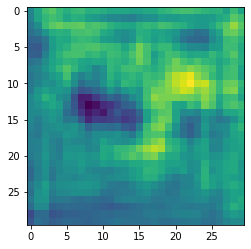

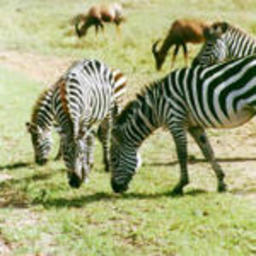

0.6438602805137634


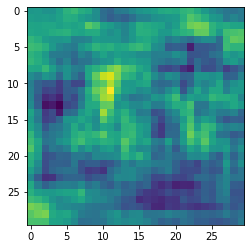

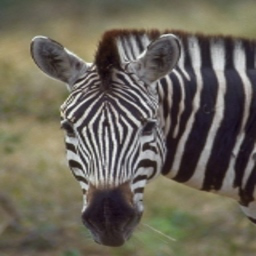

0.23372575640678406


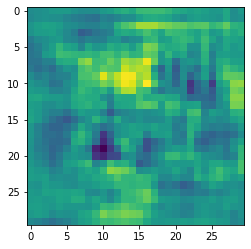

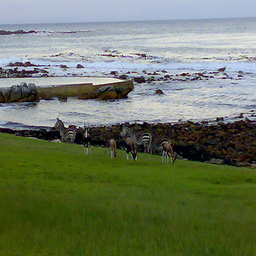

1.7281280755996704


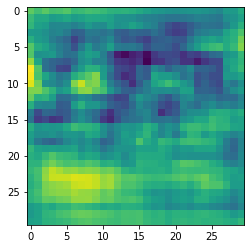

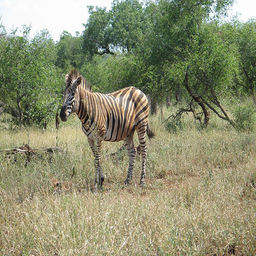

0.9085233807563782


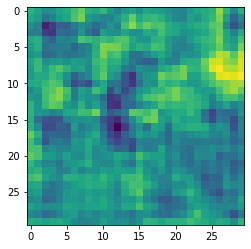

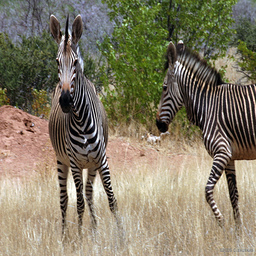

0.7526922821998596


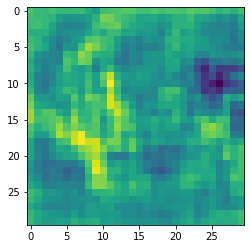

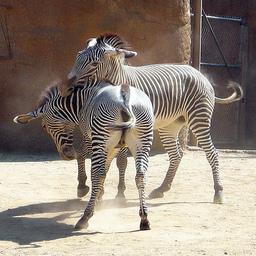

0.14040470123291016


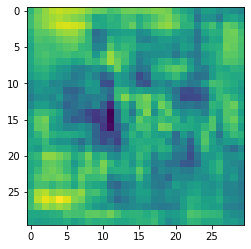

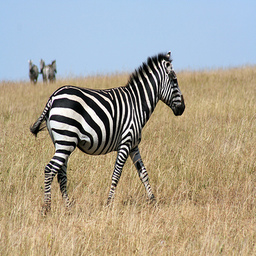

0.1941753774881363


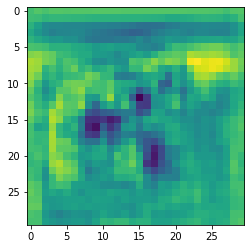

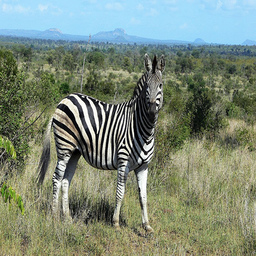

0.6792460680007935


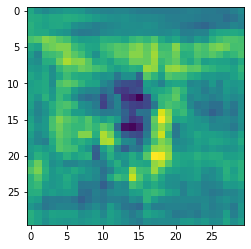

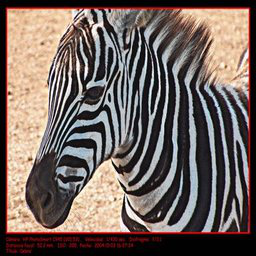

0.13057337701320648


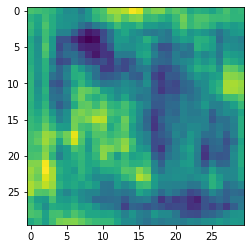

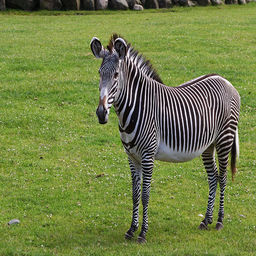

0.13632112741470337


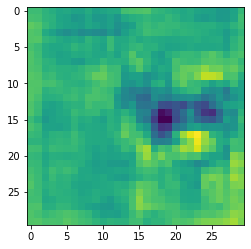

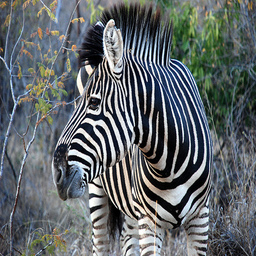

0.272973895072937


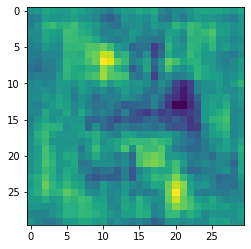

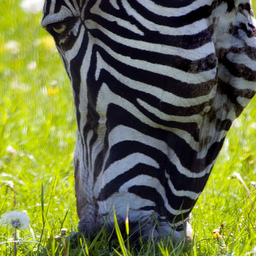

0.4285586476325989


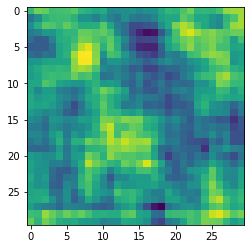

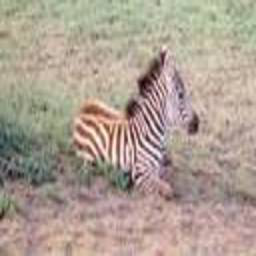

0.7826371788978577


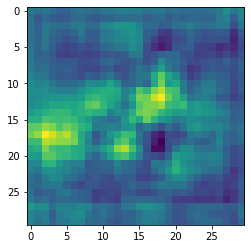

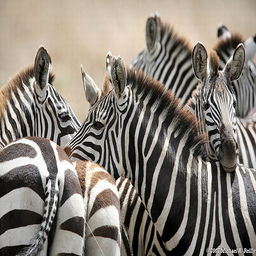

0.33351704478263855


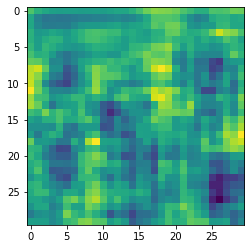

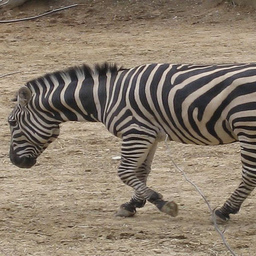

0.17532731592655182


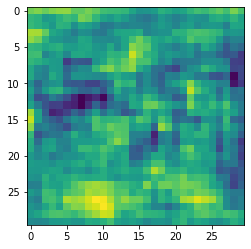

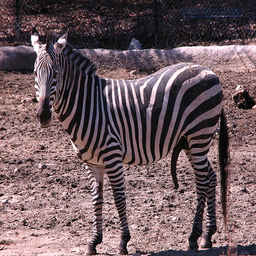

0.4503525197505951


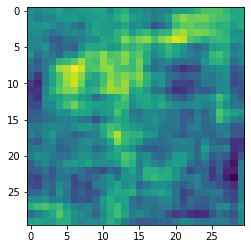

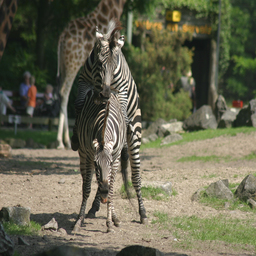

0.6910834312438965


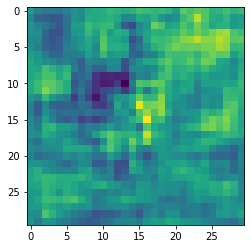

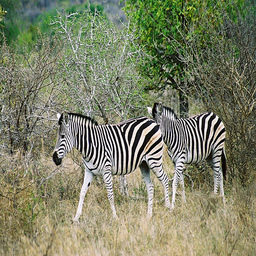

0.39953508973121643


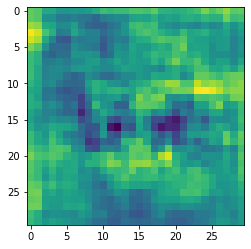

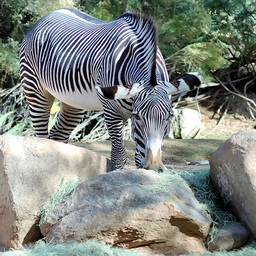

0.26847705245018005


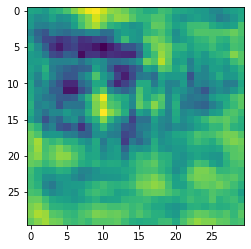

In [5]:
import glob
from PIL import Image
from matplotlib import pyplot as plt
# from IPython.display import Image
import torchvision.transforms as transforms

g = glob.glob(".\\datasets\\images for checking\\testB\\*.jpg")
transform_list = [transforms.Resize((256, 256), Image.BICUBIC), 
                  transforms.ToTensor(), 
                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
get_transform = transforms.Compose(transform_list)

for path in g[:40]:
    img = Image.open(path).convert('RGB')
    display(img)
    
    img = get_transform(img).unsqueeze(0)
    plt.imshow(D_A(img).detach().numpy()[0,0])
    print(float(loss(D_A(img), True)))
    plt.show()
    